Figure saved to: C:\Users\jeffr\principal_component_analysis_project\model_outputs\10_top_features_influencing_logistics_regression_predictions.png


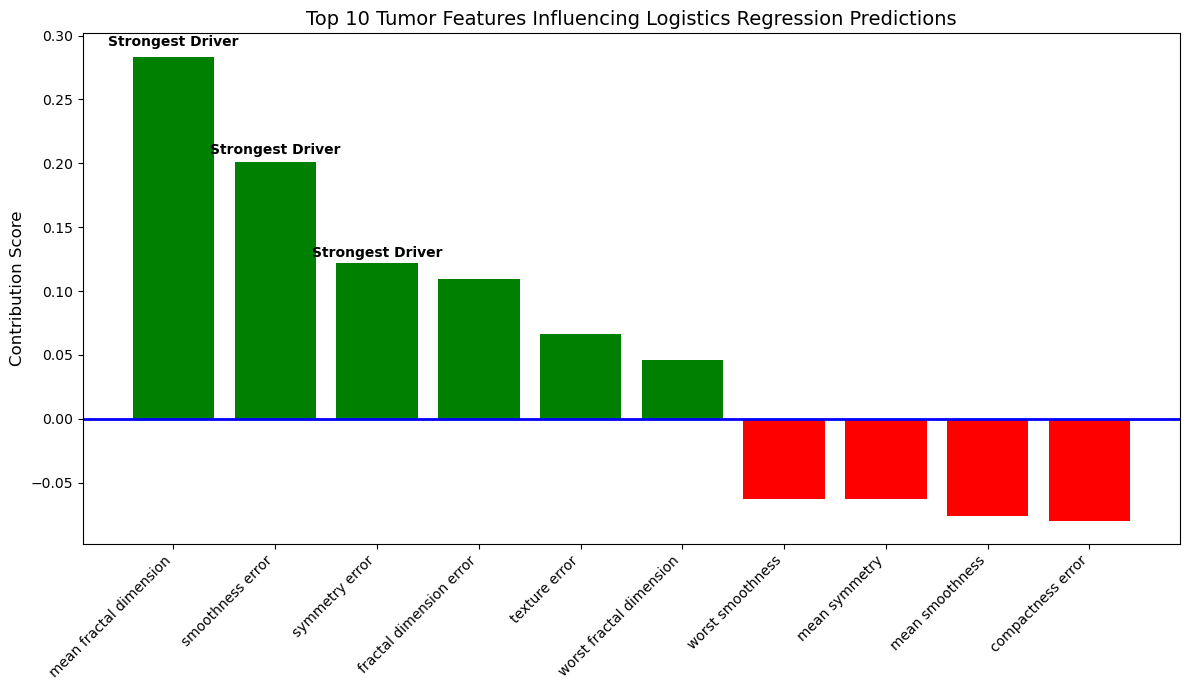

Figure saved to: C:\Users\jeffr\principal_component_analysis_project\model_outputs\2d_pca_scatter_plot_colored_by_logistic_regression_predictions.png


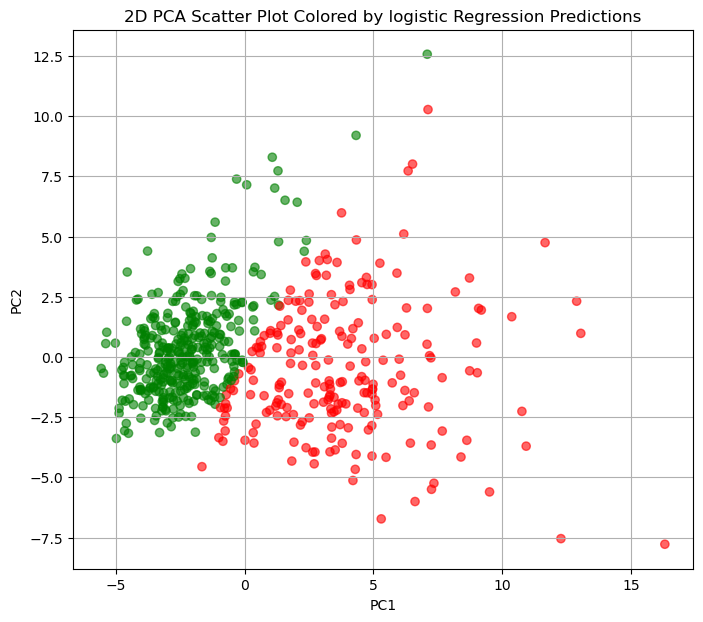

In [3]:
# Visualize these top features in a bar chart 
# Step 1 import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from pca_utils import save_figure_model

# Step 2: Load the dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target') # 0 = malignant, 1 = benign

# Step 3: Standardize the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Reduce dimensions to 2 PCA components
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# Step 5: Train logistic regression
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# step 6: Initialize and train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Step 7: Logistic regression coefficient 
logreg_coefs = logreg.coef_[0]   

# Step 8: PCA Loadings 
loadings = pd.DataFrame(pca.components_.T, index=X.columns,
                        columns=['PC1', 'PC2'])

# Step 9: Calculate the contribution of original features to logistics regression
feature_contribution = loadings.values @ logreg_coefs
feature_contribution = pd.Series(feature_contribution, index=X.columns).sort_values(ascending=False)

# Step 10 bar cart of 10 top features
top_features = feature_contribution.sort_values(ascending=False).head(10)

plt.figure(figsize=(12,7))

# Color coding: green = benign-driving, red = malignant-driving
colors = ['green' if val > 0 else 'red' for val in top_features]
bars = plt.bar(top_features.index, top_features.values, color=colors)
# Add zero line for visual separation
plt.axhline(0, color='blue', linewidth=2)
plt.ylabel('Contribution Score', fontsize=12)
plt.title('Top 10 Tumor Features Influencing Logistics Regression Predictions', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Annotate top 3 strongest features
for i, (feature, value) in enumerate(top_features.items()):
    if i < 3:   # annotate only top 3
        plt.text(
            i, value + (0.02 * value),
            'Strongest Driver',
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )
plt.tight_layout()
fig = plt.gcf()
save_figure_model(fig, "10_top_features_influencing_logistics_regression_predictions.png")
plt.show()
            
# Step 11: Predict on the whole PCA-transformed dataset
y_pred = logreg.predict(X_pca)

# Step 12: 2D PCA scatter plot colored by predictions
plt.figure(figsize=(8,7))
colors = ['red' if label==0 else 'green' for label in y_pred]
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Scatter Plot Colored by logistic Regression Predictions')
plt.grid(True)
fig = plt.gcf()
save_figure_model(fig, "2d_pca_scatter_plot_colored_by_logistic_regression_predictions.png")
plt.show()            